In [670]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [671]:
df = pd.read_csv('CovidData.csv')

In [672]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [673]:
df.shape

(1048575, 21)

In [674]:
df.isnull().sum()
#It seems that there are no null values but there are becuase data description sad 
# In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
# sex: 1 for female and 2 for male.

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [675]:
#Checking unique values in each column
for col in df.columns:
    print(col, ':', df[col].unique())

USMER : [2 1]
MEDICAL_UNIT : [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX : [1 2]
PATIENT_TYPE : [1 2]
DATE_DIED : ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '09/05/2020' '10/05/2020'
 '11/05/2020' '12/05/2020' '13/05/2020' '14/05/2020' '15/05/2020'
 '16/05/2020' '17/05/2020' 

In [676]:
#In boolean column 1 means yes and 2 means,also 97,98 and 99 means not exist so we create function to replace them
def replace_values(df, columns):
    for col in columns:
        df[col].replace({2: 0, 97: np.nan, 98: np.nan, 99: np.nan}, inplace=True)

In [677]:
replace_values(df,['RENAL_CHRONIC','TOBACCO','INTUBED','PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO','ICU'])

In [678]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [679]:
#Female is 1 and 2 is male, replace values for easier graphic use and further analysis
df['SEX'].replace({1:'Female',2:"Male"},inplace=True)

In [680]:
#We can see that number of males and females are pretty equal
df["SEX"].value_counts()

Female    525064
Male      523511
Name: SEX, dtype: int64

In [681]:
#Eventhough pregnant column is boolean we treat it differently.We can not just say that 97,98 and 99 are np.nan because male can not be pregnant
#Down bellow we can see that there are no Males with pregnant value 2 (meaning no according to dataset convention)
#So all males values are under 97,98 and 99 and they should become 0 (means not pregnant) and the rest 97,98 and 99 values are unknown woman pregnant so they become np.nan  
df[(df["PREGNANT"]==2) & (df["SEX"]=="Male")].count().head(3)

USMER           0
MEDICAL_UNIT    0
SEX             0
dtype: int64

In [682]:
#So whereever male has value in (97,98 and 99) we put 0 in sex column becuase male can not be pregnant
df.loc[df["PREGNANT"].isin([97, 98, 99]) & (df["SEX"] == "Male"), "PREGNANT"] = 0

#After that we regulary go through column and change all values 97,98 and 99 to np.nan becuase those are only values for woman
#Also changing 2 to 0
df["PREGNANT"].replace({2: 0, 97: np.nan, 98: np.nan,99: np.nan}, inplace=True)

In [683]:
#In clasification column values 1,2,3 means that patient got COVID infection and higher numbers means that did not.
df["CLASIFFICATION_FINAL"].replace({2:1,3:1,4:0,5:0,6:0,7:0},inplace=True)


In [684]:
df.rename(columns={'CLASIFFICATION_FINAL':'ANTIGEN_TEST'},inplace=True)

In [685]:
#In column patient type 1 means patient was returned home and 2 means patient was hospitalized.We create column Hospytalized with 
#with 0 and 1 values
df = df.rename(columns={"PATIENT_TYPE":"HOSPITALIZED"})
df["HOSPITALIZED"].replace({1:0,2:1},inplace=True)

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   USMER           1048575 non-null  int64  
 1   MEDICAL_UNIT    1048575 non-null  int64  
 2   SEX             1048575 non-null  object 
 3   HOSPITALIZED    1048575 non-null  int64  
 4   DATE_DIED       1048575 non-null  object 
 5   INTUBED         192706 non-null   float64
 6   PNEUMONIA       1032572 non-null  float64
 7   AGE             1048575 non-null  int64  
 8   PREGNANT        1044821 non-null  float64
 9   DIABETES        1045237 non-null  float64
 10  COPD            1045572 non-null  float64
 11  ASTHMA          1045596 non-null  float64
 12  INMSUPR         1045171 non-null  float64
 13  HIPERTENSION    1045471 non-null  float64
 14  OTHER_DISEASE   1043530 non-null  float64
 15  CARDIOVASCULAR  1045499 non-null  float64
 16  OBESITY         1045543 non-null  fl

In [687]:
#In column DATE_DIED we have that if patient died and 9999-99-99 if does not so we change this column to Died 1 for yes(had date previous)and the other for no
df = df.rename(columns={"DATE_DIED":"DIED"})
df["DIED"] = df["DIED"].replace("9999-99-99",0).replace([value for value in df["DIED"].unique() if value !=0],1)


In [688]:
df.isnull().sum()

USMER                  0
MEDICAL_UNIT           0
SEX                    0
HOSPITALIZED           0
DIED                   0
INTUBED           855869
PNEUMONIA          16003
AGE                    0
PREGNANT            3754
DIABETES            3338
COPD                3003
ASTHMA              2979
INMSUPR             3404
HIPERTENSION        3104
OTHER_DISEASE       5045
CARDIOVASCULAR      3076
OBESITY             3032
RENAL_CHRONIC       3006
TOBACCO             3220
ANTIGEN_TEST           0
ICU               856032
dtype: int64

In [689]:
#We have 81% of unknown data in "INTUBED" column so we will drop the column
intube_unknown = df["INTUBED"].isna().sum()
intube_known = df["INTUBED"].value_counts().sum()
intube_unknown_perc = intube_unknown/(intube_unknown+intube_known)
intube_unknown_perc

0.816221061917364

In [690]:
df.drop("INTUBED",axis=1,inplace=True)

In [691]:
#We also have 81% of unknown data in "ICU" column so we will drop the column
intube_unknown = df["ICU"].isna().sum()
intube_known = df["ICU"].value_counts().sum()
intube_unknown_perc = intube_unknown/(intube_unknown+intube_known)
intube_unknown_perc

0.8163765109791861

In [692]:
df.drop("ICU",axis=1,inplace=True)

In [693]:
df.isnull().sum()

USMER                 0
MEDICAL_UNIT          0
SEX                   0
HOSPITALIZED          0
DIED                  0
PNEUMONIA         16003
AGE                   0
PREGNANT           3754
DIABETES           3338
COPD               3003
ASTHMA             2979
INMSUPR            3404
HIPERTENSION       3104
OTHER_DISEASE      5045
CARDIOVASCULAR     3076
OBESITY            3032
RENAL_CHRONIC      3006
TOBACCO            3220
ANTIGEN_TEST          0
dtype: int64

In [694]:

intube_unknown = df["PNEUMONIA"].isna().sum()
intube_known = df["PNEUMONIA"].value_counts().sum()
intube_unknown_perc = intube_unknown/(intube_unknown+intube_known)
intube_unknown_perc

0.015261664640106812

In [696]:
#We have 4231 patients that have null data in more then one column 
df[df.isna().sum(axis=1)>1].count().head(1)

USMER    4231
dtype: int64

In [697]:
#We have 22367 patients that have null data in at least one column and that is 22367 data of 1048575 data so it is 2 percent of data. We will drop these patients
#that have at least one null value in their records(row in table) and also 4231 patient that have more then one null value.
df[df.isna().sum(axis=1)==1].count().head(1)

USMER    22367
dtype: int64

In [698]:
df.dropna(inplace=True)

In [699]:
#We droped all missing values
df.isna().sum()

USMER             0
MEDICAL_UNIT      0
SEX               0
HOSPITALIZED      0
DIED              0
PNEUMONIA         0
AGE               0
PREGNANT          0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
ANTIGEN_TEST      0
dtype: int64

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   USMER           1021977 non-null  int64  
 1   MEDICAL_UNIT    1021977 non-null  int64  
 2   SEX             1021977 non-null  object 
 3   HOSPITALIZED    1021977 non-null  int64  
 4   DIED            1021977 non-null  int64  
 5   PNEUMONIA       1021977 non-null  float64
 6   AGE             1021977 non-null  int64  
 7   PREGNANT        1021977 non-null  float64
 8   DIABETES        1021977 non-null  float64
 9   COPD            1021977 non-null  float64
 10  ASTHMA          1021977 non-null  float64
 11  INMSUPR         1021977 non-null  float64
 12  HIPERTENSION    1021977 non-null  float64
 13  OTHER_DISEASE   1021977 non-null  float64
 14  CARDIOVASCULAR  1021977 non-null  float64
 15  OBESITY         1021977 non-null  float64
 16  RENAL_CHRONIC   1021977 non-null  fl

In [701]:
df.nunique()

USMER               2
MEDICAL_UNIT       13
SEX                 2
HOSPITALIZED        2
DIED                2
PNEUMONIA           2
AGE               121
PREGNANT            2
DIABETES            2
COPD                2
ASTHMA              2
INMSUPR             2
HIPERTENSION        2
OTHER_DISEASE       2
CARDIOVASCULAR      2
OBESITY             2
RENAL_CHRONIC       2
TOBACCO             2
ANTIGEN_TEST        2
dtype: int64

In [702]:
#We can see that only ore "SEX" column is categorical (we input Male and Females) and all other columns are boolean column (1 for yes and 0 for no) 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("We have {} numeric features in our dataset".format(len(numeric_features)))
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} categorical features in our dataset and that is {} column".format(len(categorical_features),categorical_features))

We have 18 numeric features in our dataset
We have 1 categorical features in our dataset and that is ['SEX'] column


<Axes: xlabel='AGE', ylabel='Count'>

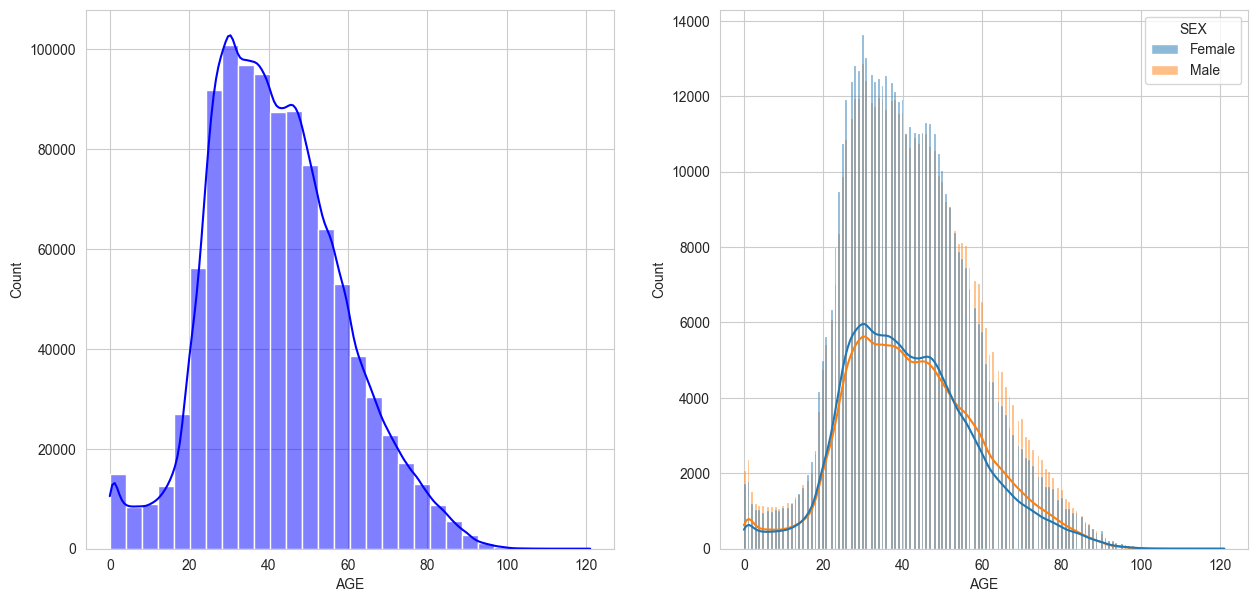

In [703]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df["AGE"],bins=30,kde=True,color="blue")
plt.subplot(122)
sns.histplot(data=df,x=df["AGE"],hue=df["SEX"],kde=True,color="green")

Insight
* Most of the patients in our study were middle aged people around 30 years old.
* There where no significant difference between males and females,in bouth groups most of the patients are around 30 years old.
* We can use skewness test from scipy.stats package to mathematicaly confirm right skewness of the "AGE" distribution (shown visually from histogram) 

In [704]:
from scipy.stats import skew

skewness = skew(df["AGE"])
if skewness>0:
    print("Population is right-skewed")
else:
    print("Population is left-skewed")

Population is right-skewed


We will aim to inspect what is the influence of all other risk factors on patient hospitalization and mortality and later chose if we are going to predict
mortality or hospitalization 

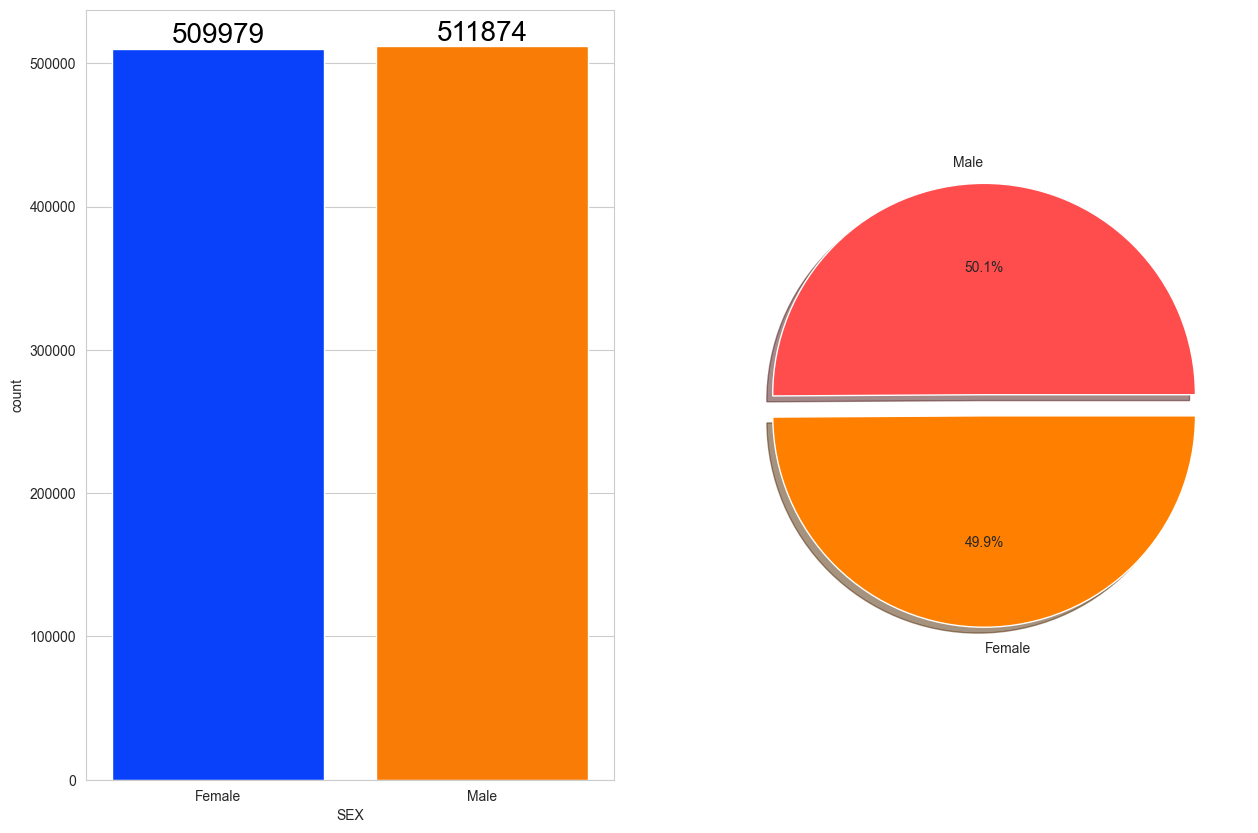

In [728]:
f,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(x=df['SEX'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['SEX'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
* Our patient population is almost equal comparing number of male patients with number of female patients

<Axes: >

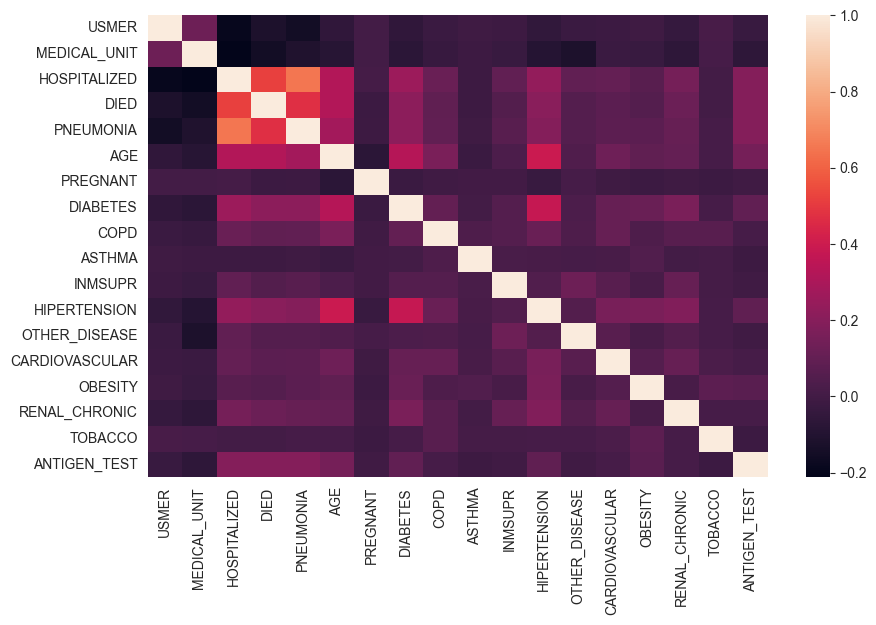

In [706]:
#We are going to check corelation between all column in df dataset

plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr())

Insight
* From graph we can see that biggest corelation is between indipendent variables "PNEUMONIA" and "AGE" and dependent variables "DIED" and "HOSPITALIZED"
* Antigen test results did not show significant corelation with deaths and hospitalizations
* Down bellow are numerical insight


In [707]:

died_corelation = df.corr()["DIED"]
died_corelation.sort_values(ascending=False).head(5)

DIED            1.000000
HOSPITALIZED    0.520156
PNEUMONIA       0.470891
AGE             0.322696
DIABETES        0.217124
Name: DIED, dtype: float64

In [708]:
hospitalized_corelation = df.corr()["HOSPITALIZED"]
hospitalized_corelation.sort_values(ascending=False).head(5)

HOSPITALIZED    1.000000
PNEUMONIA       0.652445
DIED            0.520156
AGE             0.322353
DIABETES        0.257165
Name: HOSPITALIZED, dtype: float64

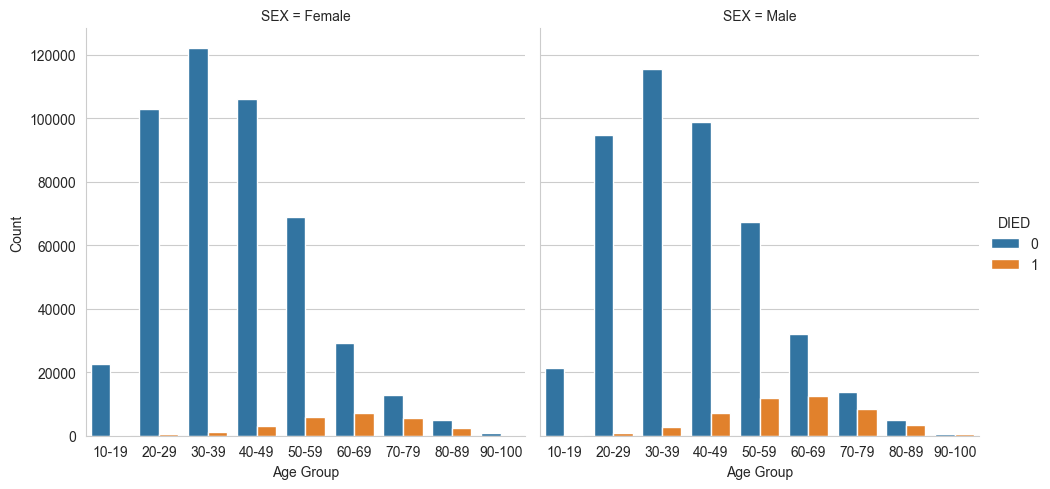

In [709]:
#We put ages in bins so we can present data visually, in other way it would be too much values to present on X axis using just "AGE" column
bins = [10,20,30,40,50,60,70,80,90,100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df["Age_Group"] = pd.cut(df["AGE"],bins=bins,labels=labels)
sns.set_style('whitegrid')
g = sns.catplot(data=df,x='Age_Group',hue='DIED',kind='count',col='SEX',col_wrap=2)
g.set_axis_labels("Age Group", "Count")
g.set_xticklabels(labels)

Insight
* Most of the people died were between 50-70 years old not more then 70 as expected.
* It was similar in both groups, Male and Females.

<Figure size 1000x600 with 0 Axes>

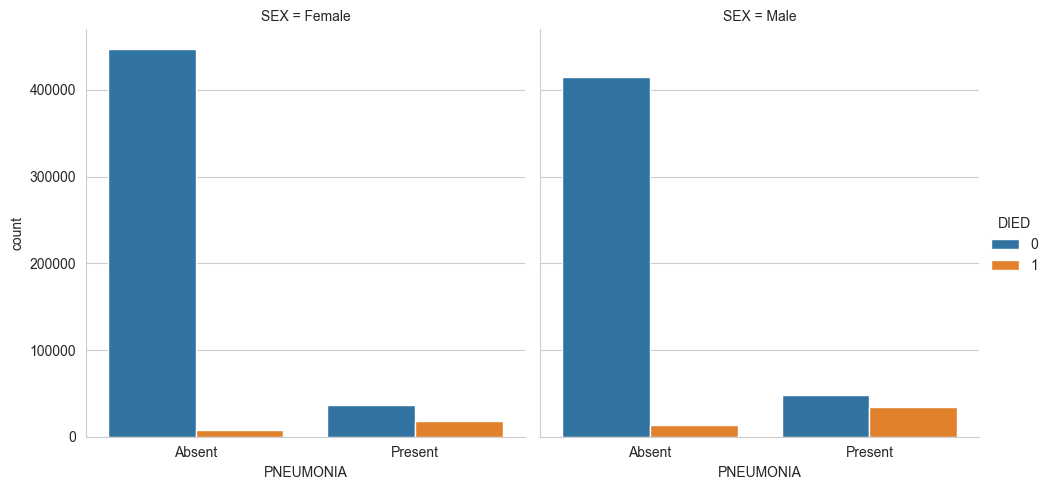

In [710]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
g = sns.catplot(data=df,x='PNEUMONIA',hue='DIED',kind='count',col='SEX',col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(['Absent','Present'])
sns.despine()

Insight
* We can see that there were more pneumonia present in the male population and that more male patients dued then female patients

In [711]:
male_pneumonia_patient_died = len(df[(df["SEX"]=='Male')&(df["DIED"]==1)&(df["PNEUMONIA"]==1)])
female_pneumonia_patients_died = len(df[(df["SEX"]=='Female')&(df["DIED"]==1)&(df["PNEUMONIA"]==1)])
male_pneumonia_patients_survived = len(df[(df["SEX"]=='Male')&(df["DIED"]==0)&(df["PNEUMONIA"]==1)])
female_pneumonia_patients_survived = len(df[(df["SEX"]=='Female')&(df["DIED"]==0)&(df["PNEUMONIA"]==1)])
print("There we {} male patients that had pneumonia and died and {} female patients that had pneumonia and died".format(male_pneumonia_patient_died,female_pneumonia_patients_died))
print("In male population {:.2f}% of men that had pneumonia died and {:.2f}% of women that had pneumonia died".format((male_pneumonia_patient_died/(male_pneumonia_patient_died+male_pneumonia_patients_survived)*100),(female_pneumonia_patients_died/(female_pneumonia_patients_died+female_pneumonia_patients_survived) * 100)))


There we 34153 male patients that had pneumonia and died and 18596 female patients that had pneumonia and died
In male population 41.30% of men that had pneumonia died and 34.02% of women that had pneumonia died


Insight
* Mortality in male population was almost double compared to women population 

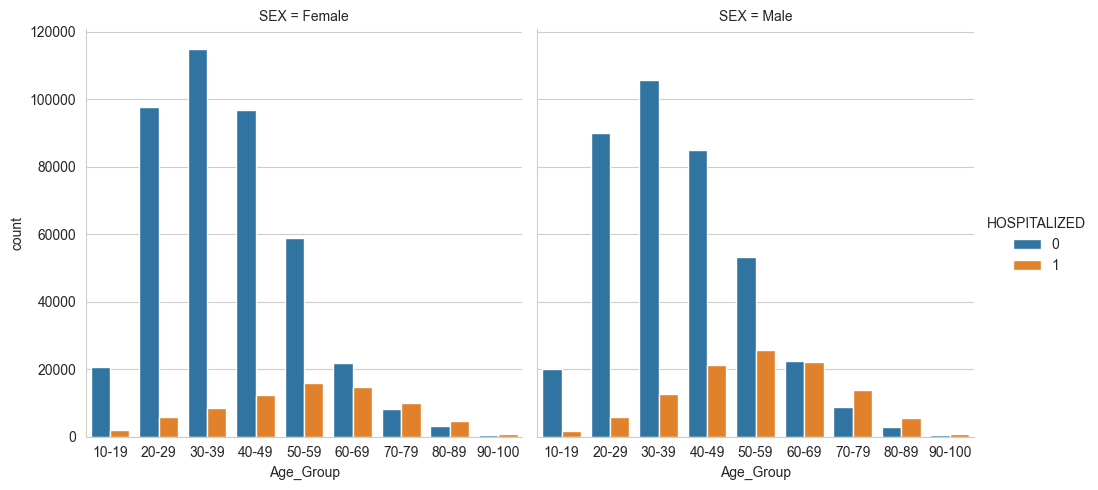

In [712]:
#Now we check similar regarding "HOSPITALIZED" feature
#We put ages in bins so we can present data visually, in other way it would be too much values to present on X axis using just "AGE" column
bins = [10,20,30,40,50,60,70,80,90,100]
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
df["Age_Group"]=pd.cut(df["AGE"],bins=bins,labels=labels)
sns.set_style('whitegrid')
g = sns.catplot(data=df,x='Age_Group',hue='HOSPITALIZED',kind='count',col='SEX',col_wrap=2)

Insights
* Situation is similar looking on hospitalization feature. Most patient that were hospitalized had age between 50-70 years old in both Male and Female population

<Figure size 1000x600 with 0 Axes>

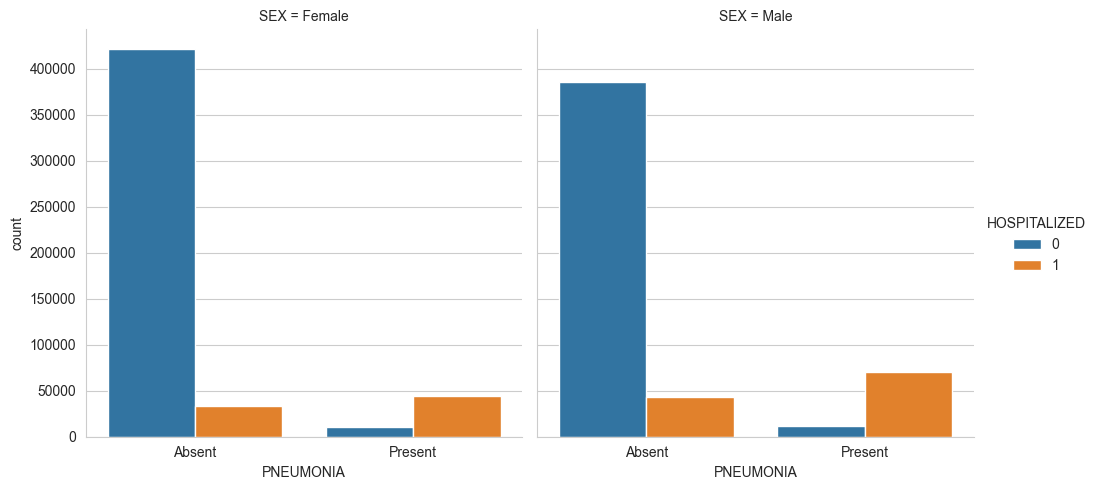

In [713]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
g = sns.catplot(data=df,x='PNEUMONIA',hue='HOSPITALIZED',kind='count',col='SEX',col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(['Absent','Present'])
sns.despine()

Insights
* Same as regarding died statistics, there were also more male patients that were hospitalized and the percentage of male patients that had pneumonia with necessery hospitalization were higher than a percentage of woman that had pneumonia and necessery hospitalization

In [714]:
male_pneumonia_patient_hosp = len(df[(df["SEX"]=='Male')&(df["HOSPITALIZED"]==1)&(df["PNEUMONIA"]==1)])
female_pneumonia_patients_hosp = len(df[(df["SEX"]=='Female')&(df["HOSPITALIZED"]==1)&(df["PNEUMONIA"]==1)])
male_pneumonia_patients_nohosp = len(df[(df["SEX"]=='Male')&(df["HOSPITALIZED"]==0)&(df["PNEUMONIA"]==1)])
female_pneumonia_patients_nohosp = len(df[(df["SEX"]=='Female')&(df["HOSPITALIZED"]==0)&(df["PNEUMONIA"]==1)])
print("There we {} male patients that had pneumonia and hospitalized and {} female patients that had pneumonia and hospitalized".format(male_pneumonia_patient_hosp,female_pneumonia_patients_hosp))
print("In male population {:.2f}% of men that had pneumonia were hospitalized and {:.2f}% of women that had pneumonia were hospitalized".format((male_pneumonia_patient_hosp/(male_pneumonia_patient_hosp+male_pneumonia_patients_nohosp)*100),(female_pneumonia_patients_hosp/(female_pneumonia_patients_hosp+female_pneumonia_patients_nohosp) * 100)))

There we 70516 male patients that had pneumonia and hospitalized and 44001 female patients that had pneumonia and hospitalized
In male population 85.27% of men that had pneumonia were hospitalized and 80.50% of women that had pneumonia were hospitalized


<Figure size 1000x600 with 0 Axes>

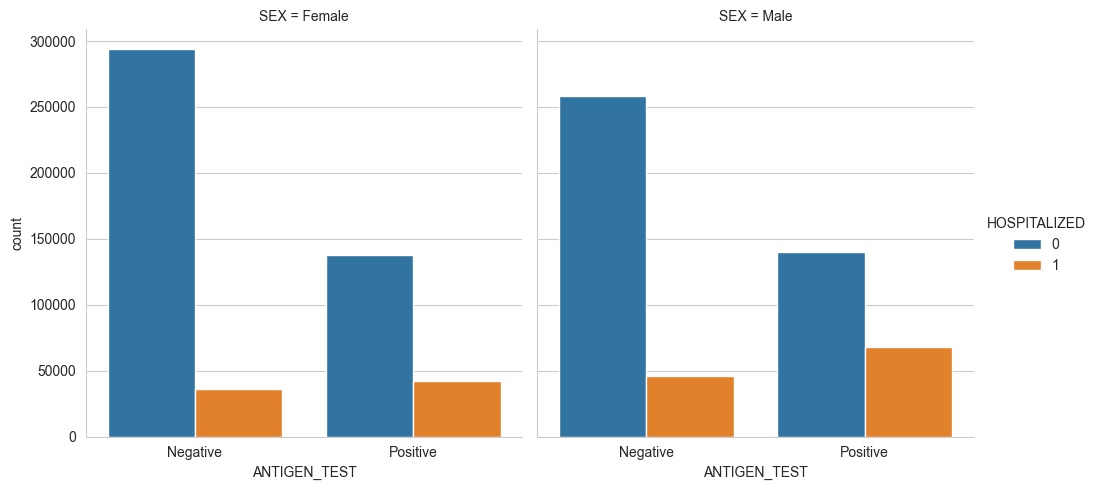

In [715]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
g = sns.catplot(data=df,x='ANTIGEN_TEST',hue='HOSPITALIZED',kind='count',col='SEX',col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(['Negative','Positive'])
sns.despine()

In [716]:
male_positive_antigen_hosp = len(df[(df["SEX"]=='Male')&(df["HOSPITALIZED"]==1)&(df["ANTIGEN_TEST"]==1)])
female_pneumonia_patients_hosp = len(df[(df["SEX"]=='Female')&(df["HOSPITALIZED"]==1)&(df["ANTIGEN_TEST"]==1)])
male_pneumonia_patients_nohosp = len(df[(df["SEX"]=='Male')&(df["HOSPITALIZED"]==0)&(df["ANTIGEN_TEST"]==1)])
female_pneumonia_patients_nohosp = len(df[(df["SEX"]=='Female')&(df["HOSPITALIZED"]==0)&(df["ANTIGEN_TEST"]==1)])
print("There we {} male patients that had positive antigen and hospitalized and {} female patients that had positive antigen test and hospitalized".format(male_pneumonia_patient_hosp,female_pneumonia_patients_hosp))
print("In male population {:.2f}% of men that had positive antigen test were hospitalized and {:.2f}% of women that had positive antigen test were hospitalized".format((male_pneumonia_patient_hosp/(male_pneumonia_patient_hosp+male_pneumonia_patients_nohosp)*100),(female_pneumonia_patients_hosp/(female_pneumonia_patients_hosp+female_pneumonia_patients_nohosp) * 100)))

There we 70516 male patients that had positive antigen and hospitalized and 41915 female patients that had positive antigen test and hospitalized
In male population 33.52% of men that had positive antigen test were hospitalized and 23.29% of women that had positive antigen test were hospitalized


<Figure size 1000x600 with 0 Axes>

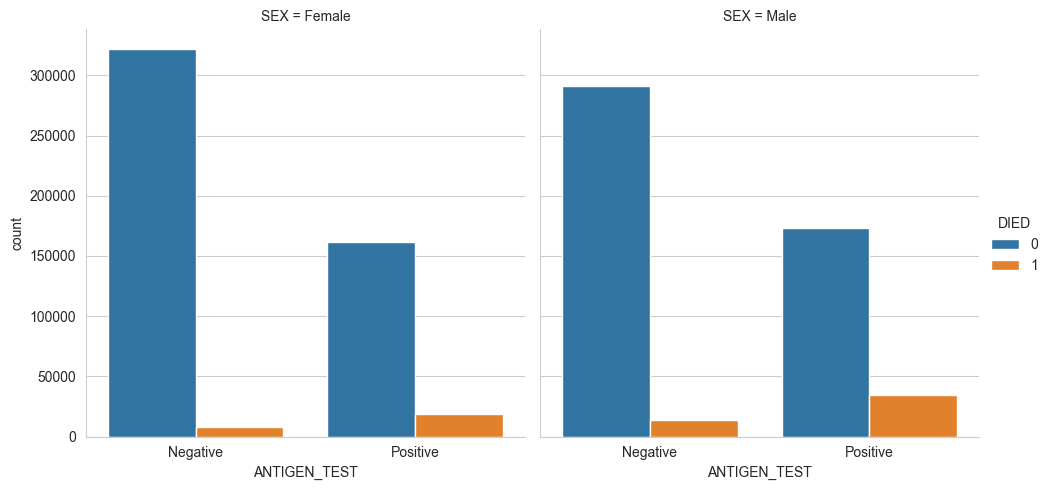

In [717]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
g = sns.catplot(data=df,x='ANTIGEN_TEST',hue='DIED',kind='count',col='SEX',col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(['Negative','Positive'])
sns.despine()

In [718]:
male_positive_antigen_died = len(df[(df["SEX"]=='Male')&(df["DIED"]==1)&(df["ANTIGEN_TEST"]==1)])
female_positive_antigen_died = len(df[(df["SEX"]=='Female')&(df["DIED"]==1)&(df["ANTIGEN_TEST"]==1)])
male_positive_antigen_not_died = len(df[(df["SEX"]=='Male')&(df["DIED"]==0)&(df["ANTIGEN_TEST"]==1)])
female_positive_antigen_not_died = len(df[(df["SEX"]=='Female')&(df["DIED"]==0)&(df["ANTIGEN_TEST"]==1)])
print("There we {} male patients that had positive antigen and died and {} female patients that had positive antigen test and died".format(male_positive_antigen_died,female_positive_antigen_died))
print("In male population {:.2f}% of men that had positive antigen test died and {:.2f}% of women that had positive antigen test died".format((male_positive_antigen_died/(male_positive_antigen_died+male_positive_antigen_not_died)*100),(female_positive_antigen_died/(female_positive_antigen_died+female_positive_antigen_not_died) * 100)))

There we 34665 male patients that had positive antigen and died and 18657 female patients that had positive antigen test and died
In male population 16.70% of men that had positive antigen test died and 10.36% of women that had positive antigen test died


<Axes: ylabel='AGE'>

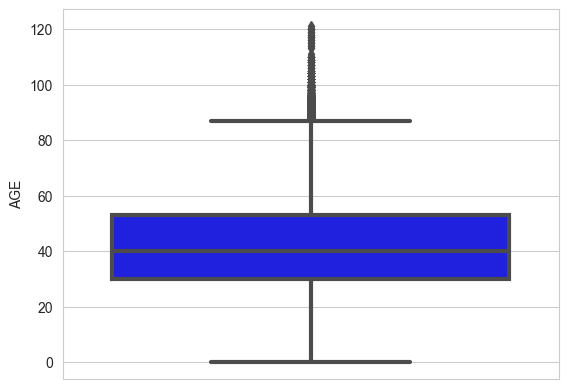

In [720]:
sns.boxplot(data=df,y='AGE',color='blue',linewidth=3)

Insights
* With help of a box plot we can se that we have outliers in the "AGE" feature and these are patients with more then 85 years old
* Down bellow we check which are these outliers according to statistics

In [721]:
Q1 = df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df["AGE"]>(1.5*IQR)+Q3) | (df["AGE"]<Q1-(1.5*IQR))]
totaly_outliers = len(outliers)
more_than_100_year_old_patients = len(outliers[outliers["AGE"]>100])
print("There are totaly {} patients that are above 1.5*IQR+Q3 range and also {} patients older than 100 years".format(totaly_outliers,more_than_100_year_old_patients))

There are totaly 5323 patients that are above 1.5*IQR+Q3 range and also 124 patients older than 100 years


* We will drop records of these 123 patients that are older than 100 years regarding there already present Age risk for death

In [722]:
df = df[~(df["AGE"]>100)]

In [723]:
from scipy.stats import chi2_contingency

chi_square_columns = ['SEX', 'HOSPITALIZED','PNEUMONIA','PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO','ANTIGEN_TEST']

significant_columns = []
p_values = []
for col in chi_square_columns:
    contingency_table = pd.crosstab(df['DIED'], df[col])
    chi2,p,dof,expected = chi2_contingency(contingency_table)
    if p<0.05:
        significant_columns.append(col)
    else:
        continue
print("All columns that got p value < 0.05 are significant and there is relationship between them and column DEAD according to chi-square statistics")
print(significant_columns)

All columns that got p value < 0.05 are significant and there is relationship between them and column DEAD according to chi-square statistics
['SEX', 'HOSPITALIZED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ANTIGEN_TEST']


In [724]:
counts = df.groupby(["HOSPITALIZED", "DIED"]).size().reset_index(name="counts")

not_host_not_died = counts[counts["HOSPITALIZED"]==0][counts["DIED"]==0]["counts"].iloc[0]
not_host_died = counts[counts["HOSPITALIZED"]==0][counts["DIED"]==1]["counts"].iloc[0]
host_not_died = counts[counts["HOSPITALIZED"]==1][counts["DIED"]==0]["counts"].iloc[0]
host_died = counts[counts["HOSPITALIZED"]==1][counts["DIED"]==1]["counts"].iloc[0]


In [725]:
print(not_host_not_died,not_host_died,host_not_died,host_died)

823619 6670 123588 67976


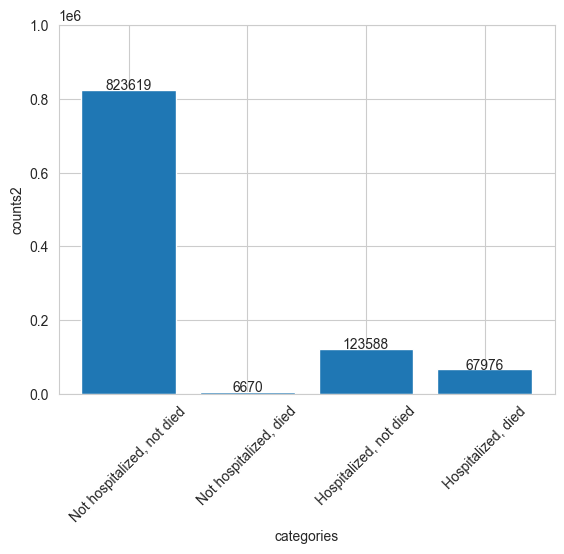

In [726]:
# Define the data
categories = ['Not hospitalized, not died', 'Not hospitalized, died', 'Hospitalized, not died', 'Hospitalized, died']
counts2 = [not_host_not_died, not_host_died, host_not_died, host_died]

# Create the bar chart
plt.bar(categories, counts2)
plt.xlabel('categories')
plt.ylabel('counts2')
plt.yticks(range(0,1100000,200000))
plt.xticks(rotation=45)


# Add y-values on the bars
for i, value in enumerate(counts2):
    plt.text(i, value , str(value), ha='center')

In [727]:
print("Out oh unhospitalized patients {:.3f} percent of them died. Out of hospitalized patients {:.3f} percent of them died".format((not_host_died/(not_host_not_died+not_host_not_died)),host_died/(host_died+host_not_died)))

Out oh unhospitalized patients 0.004 percent of them died. Out of hospitalized patients 0.355 percent of them died


In [729]:
df.to_csv('df_EDA.csv',index=False)